# Data Loader

We provide a simple data loader for the challenge. We expect that teams will have to adapt and improve this loader according to their needs. The main input parameters to the loader are a list of .h5 files and an array of pre-computed sampling masks.

It returns the channel-wise zero-filled undersampled reconstruction (input) and the channel-wise fully sampled reconstruction (target). Teams will have to adapt the loader if they want to use k-space as input, apply different normalization strategies or want to use the root sum of squares images as targets.

In [1]:
%matplotlib inline
import matplotlib.pylab as plt
import matplotlib.gridspec as gridspec
import numpy as np
import glob
import sys
sys.path.append("../../Modules/")
from data_generator import DataGenerator
from utils import sum_of_squares

Train: 0
Validation: 0
Masks: (100, 218, 170)


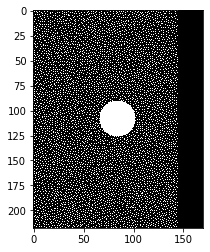

In [2]:
train = glob.glob("/media/roberto/ROBERTO-5TB/GDrive/CC359/Raw-data/Multi-channel/12-channel/Train/*.h5")
val = glob.glob("/media/roberto/ROBERTO-5TB/GDrive/CC359/Raw-data/Multi-channel/12-channel/Val/*.h5")
print("Train:",len(train))
print("Validation:",len(val))



under_masks = np.load("../../Data/poisson_sampling/R5_218x170.npy") # Load pre-computed sampling masks
                                                            # Poisson sampling is not suitable to be computed 
                                                            # on the fly
print("Masks:",under_masks.shape)


plt.figure()
plt.imshow(under_masks[0,:,:],cmap = "gray")
plt.show()

In [3]:
dim = (218,170)
batch_size = 4
n_channels = 24 # 12-channels*2 (real and imaginary)
nslices = 256
crop = (30,30) # Crops slices with little anatomy

train_generator = DataGenerator(train, dim = dim, under_masks = under_masks,  crop = crop,\
                                batch_size = batch_size, n_channels = n_channels,nslices = nslices, shuffle=True)

val_generator = DataGenerator(val, dim = dim, under_masks = under_masks,  crop = crop,\
                                batch_size = batch_size, n_channels = n_channels,nslices= nslices,shuffle=False)

../../Modules/data_generator.py:81: RuntimeWarning: invalid value encountered in true_divide
  y1 = y1/norm  # Normalized fully sampled multi-channel reference. Could be converted to root sum of squares.
../../Modules/data_generator.py:83: RuntimeWarning: invalid value encountered in true_divide
  X = X/norm # Input is the zero-filled reconstruction. Suitable for image-domain methods. Change the code to not


(4, 218, 170, 24)
(4, 218, 170, 24)


/home/roberto/Documents/software/virtualenv/venv01/lib/python3.6/site-packages/matplotlib/image.py:452: UserWarning: Warning: converting a masked element to nan.
  dv = np.float64(self.norm.vmax) - np.float64(self.norm.vmin)
/home/roberto/Documents/software/virtualenv/venv01/lib/python3.6/site-packages/matplotlib/image.py:459: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
/home/roberto/Documents/software/virtualenv/venv01/lib/python3.6/site-packages/matplotlib/image.py:464: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)
<string>:6: UserWarning: Warning: converting a masked element to nan.
/home/roberto/Documents/software/virtualenv/venv01/lib/python3.6/site-packages/numpy/core/_asarray.py:85: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


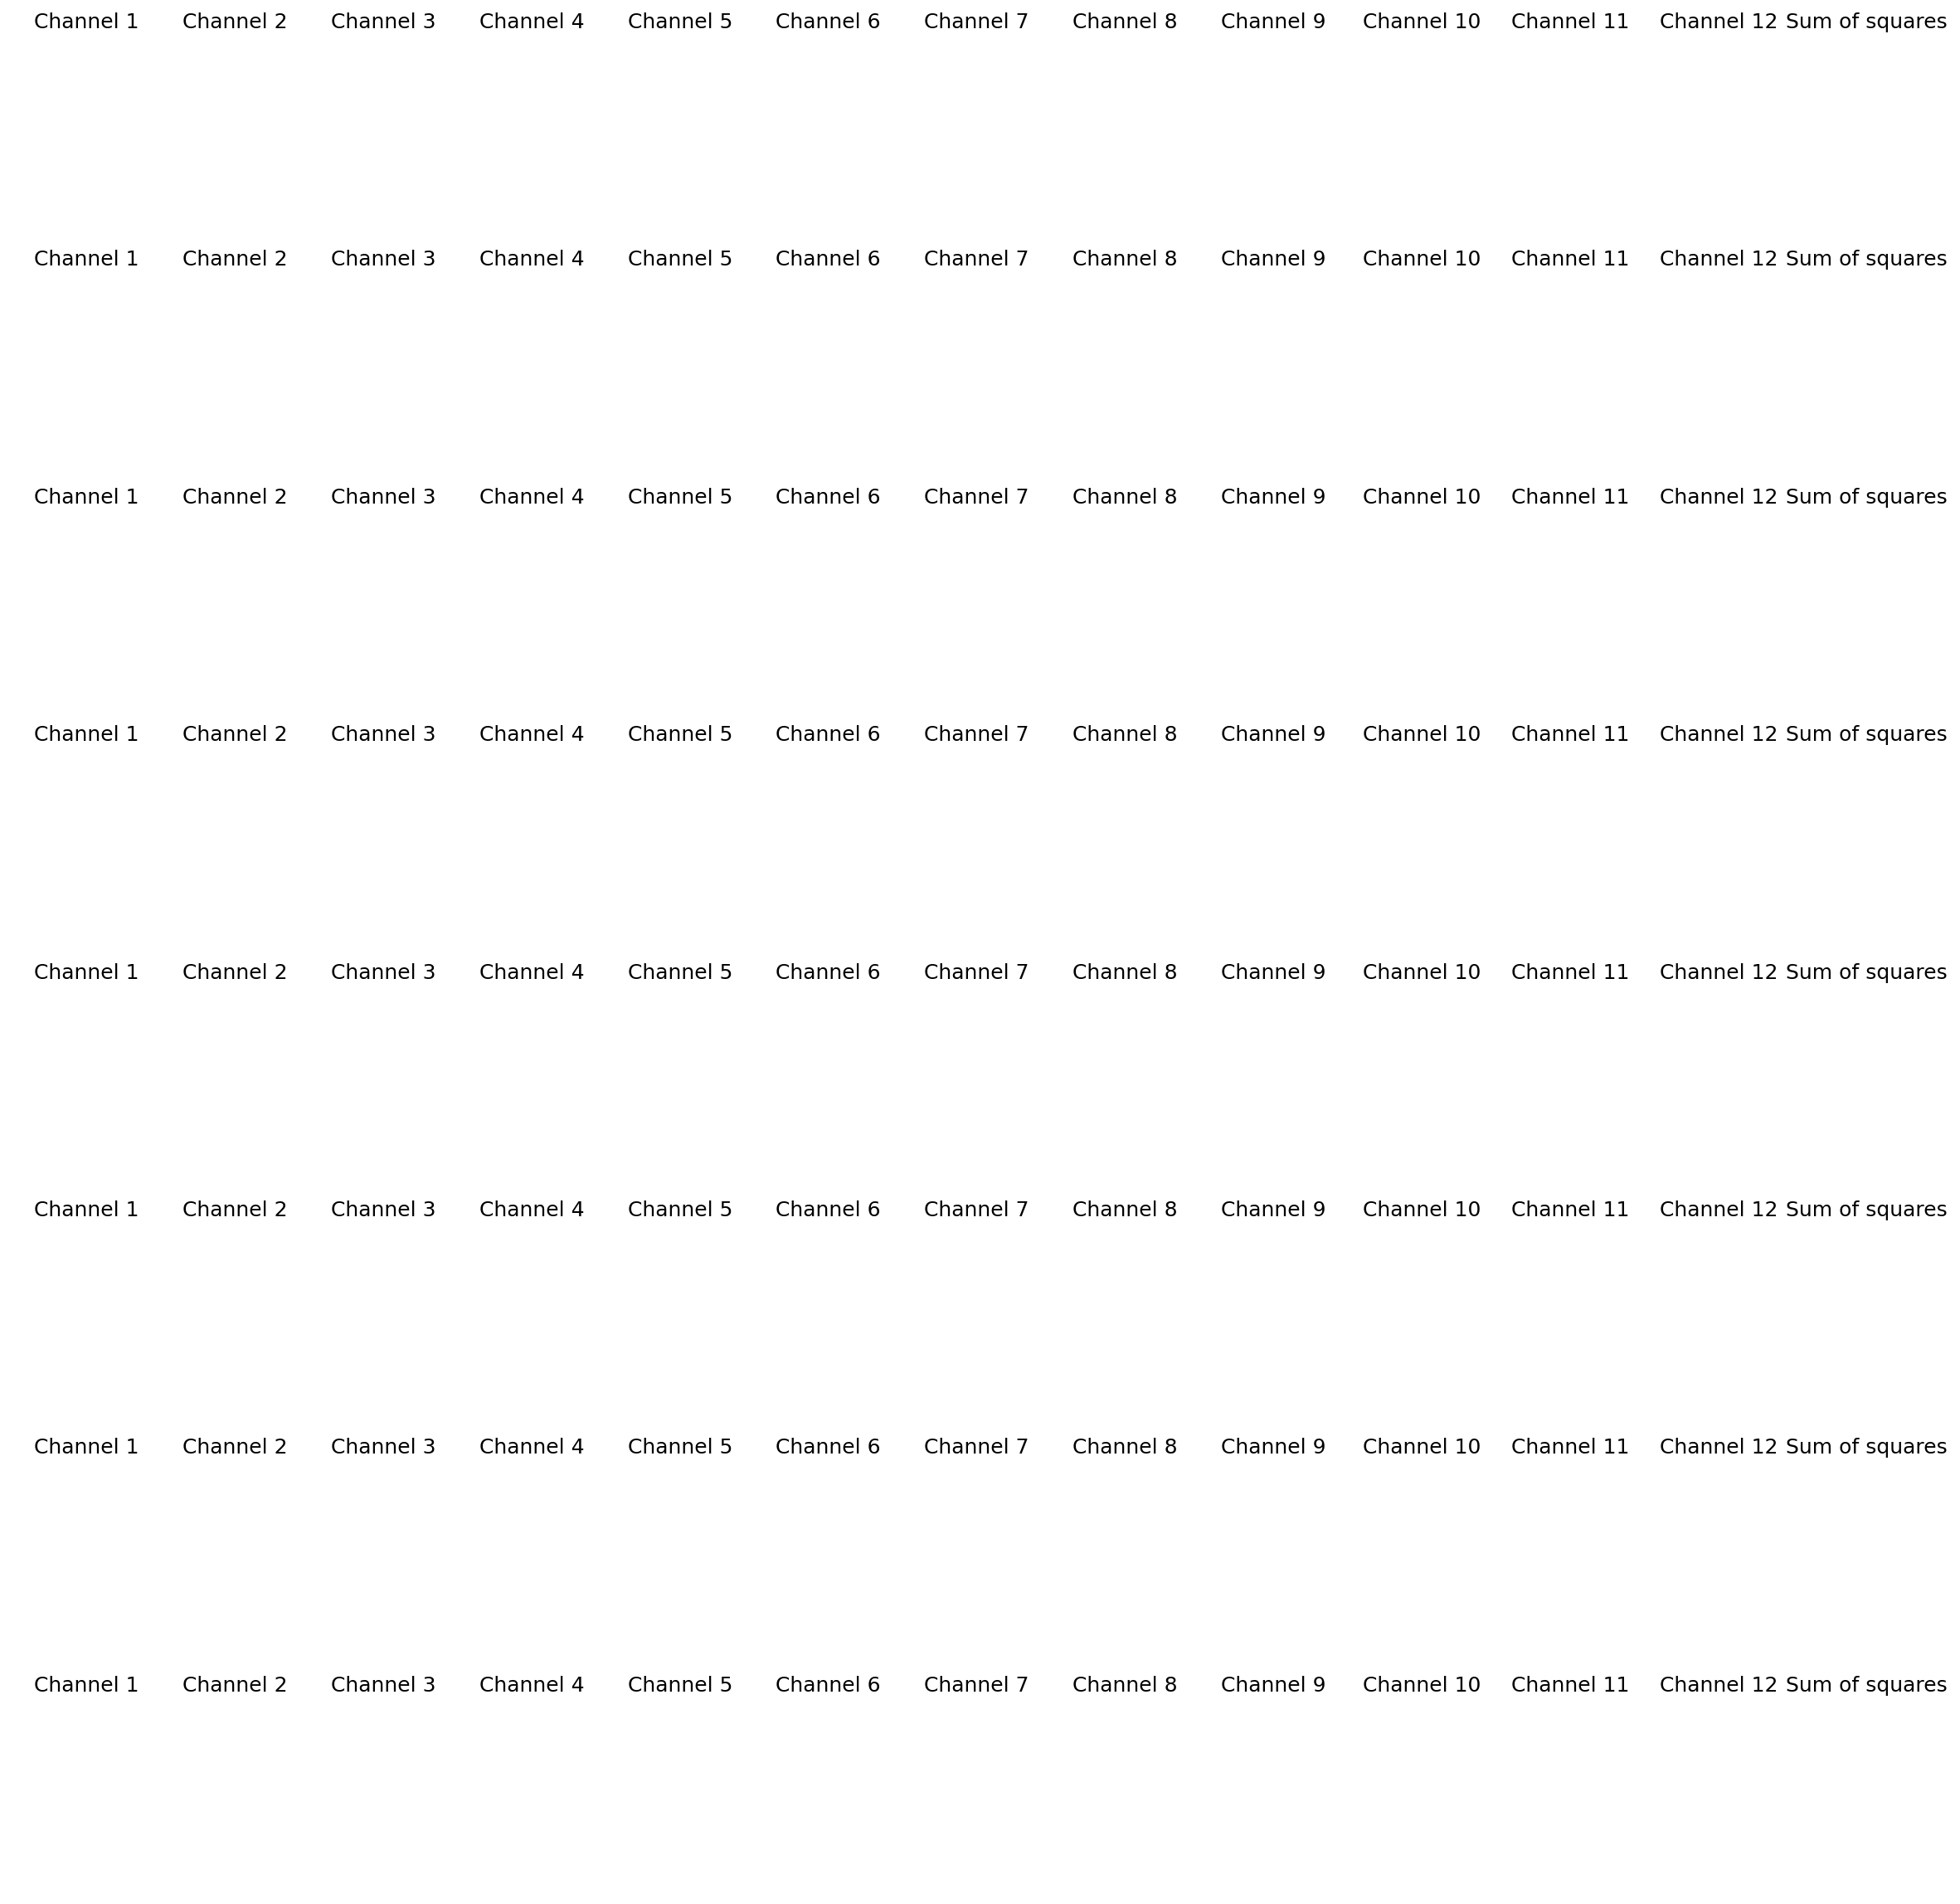

In [4]:
Xtrain,ytrain = train_generator.__getitem__(2)
print(Xtrain.shape)
print(ytrain.shape)

Xtrain = Xtrain[:,:,:,::2] +1j*Xtrain[:,:,:,1::2] # Convert to complex
ytrain = ytrain[:,:,:,::2] +1j*ytrain[:,:,:,1::2] # Convert to complex


plt.figure(figsize = (20,20),dpi = 150)
gs1 = gridspec.GridSpec(8, 13)
gs1.update(wspace=0.002, hspace=0.1)


for ii in range (batch_size*2):
    if ii%2 == 0:
        for jj in range(13): # 12-channels + root sum of squares
            if jj != 12:
                plt.subplot(gs1[ii*13+jj])
                plt.imshow(np.abs(Xtrain[ii//2,:,:,jj]),cmap = "gray")
                plt.axis("off")
                plt.title("Channel %d" %(jj+1))
                if  jj == 0:
                    plt.ylabel("Input")
            else:
                plt.subplot(gs1[ii*13+jj])
                plt.imshow(sum_of_squares(Xtrain[ii//2,:,:,:]),cmap = "gray")
                plt.axis("off")
                plt.title("Sum of squares")
    else:
        for jj in range(13): # 12-channels + root sum of squares
            if jj != 12:
                plt.subplot(gs1[ii*13+jj])
                plt.imshow(np.abs(ytrain[ii//2,:,:,jj]),cmap = "gray")
                plt.axis("off")
                plt.title("Channel %d" %(jj+1))
                if  jj == 1:
                    plt.ylabel("Target")
            else:
                plt.subplot(gs1[ii*13+jj])
                plt.imshow(sum_of_squares(ytrain[ii//2,:,:,:]),cmap = "gray")
                plt.axis("off")
                plt.title("Sum of squares")

plt.show()

(4, 218, 170, 24)
(4, 218, 170, 24)


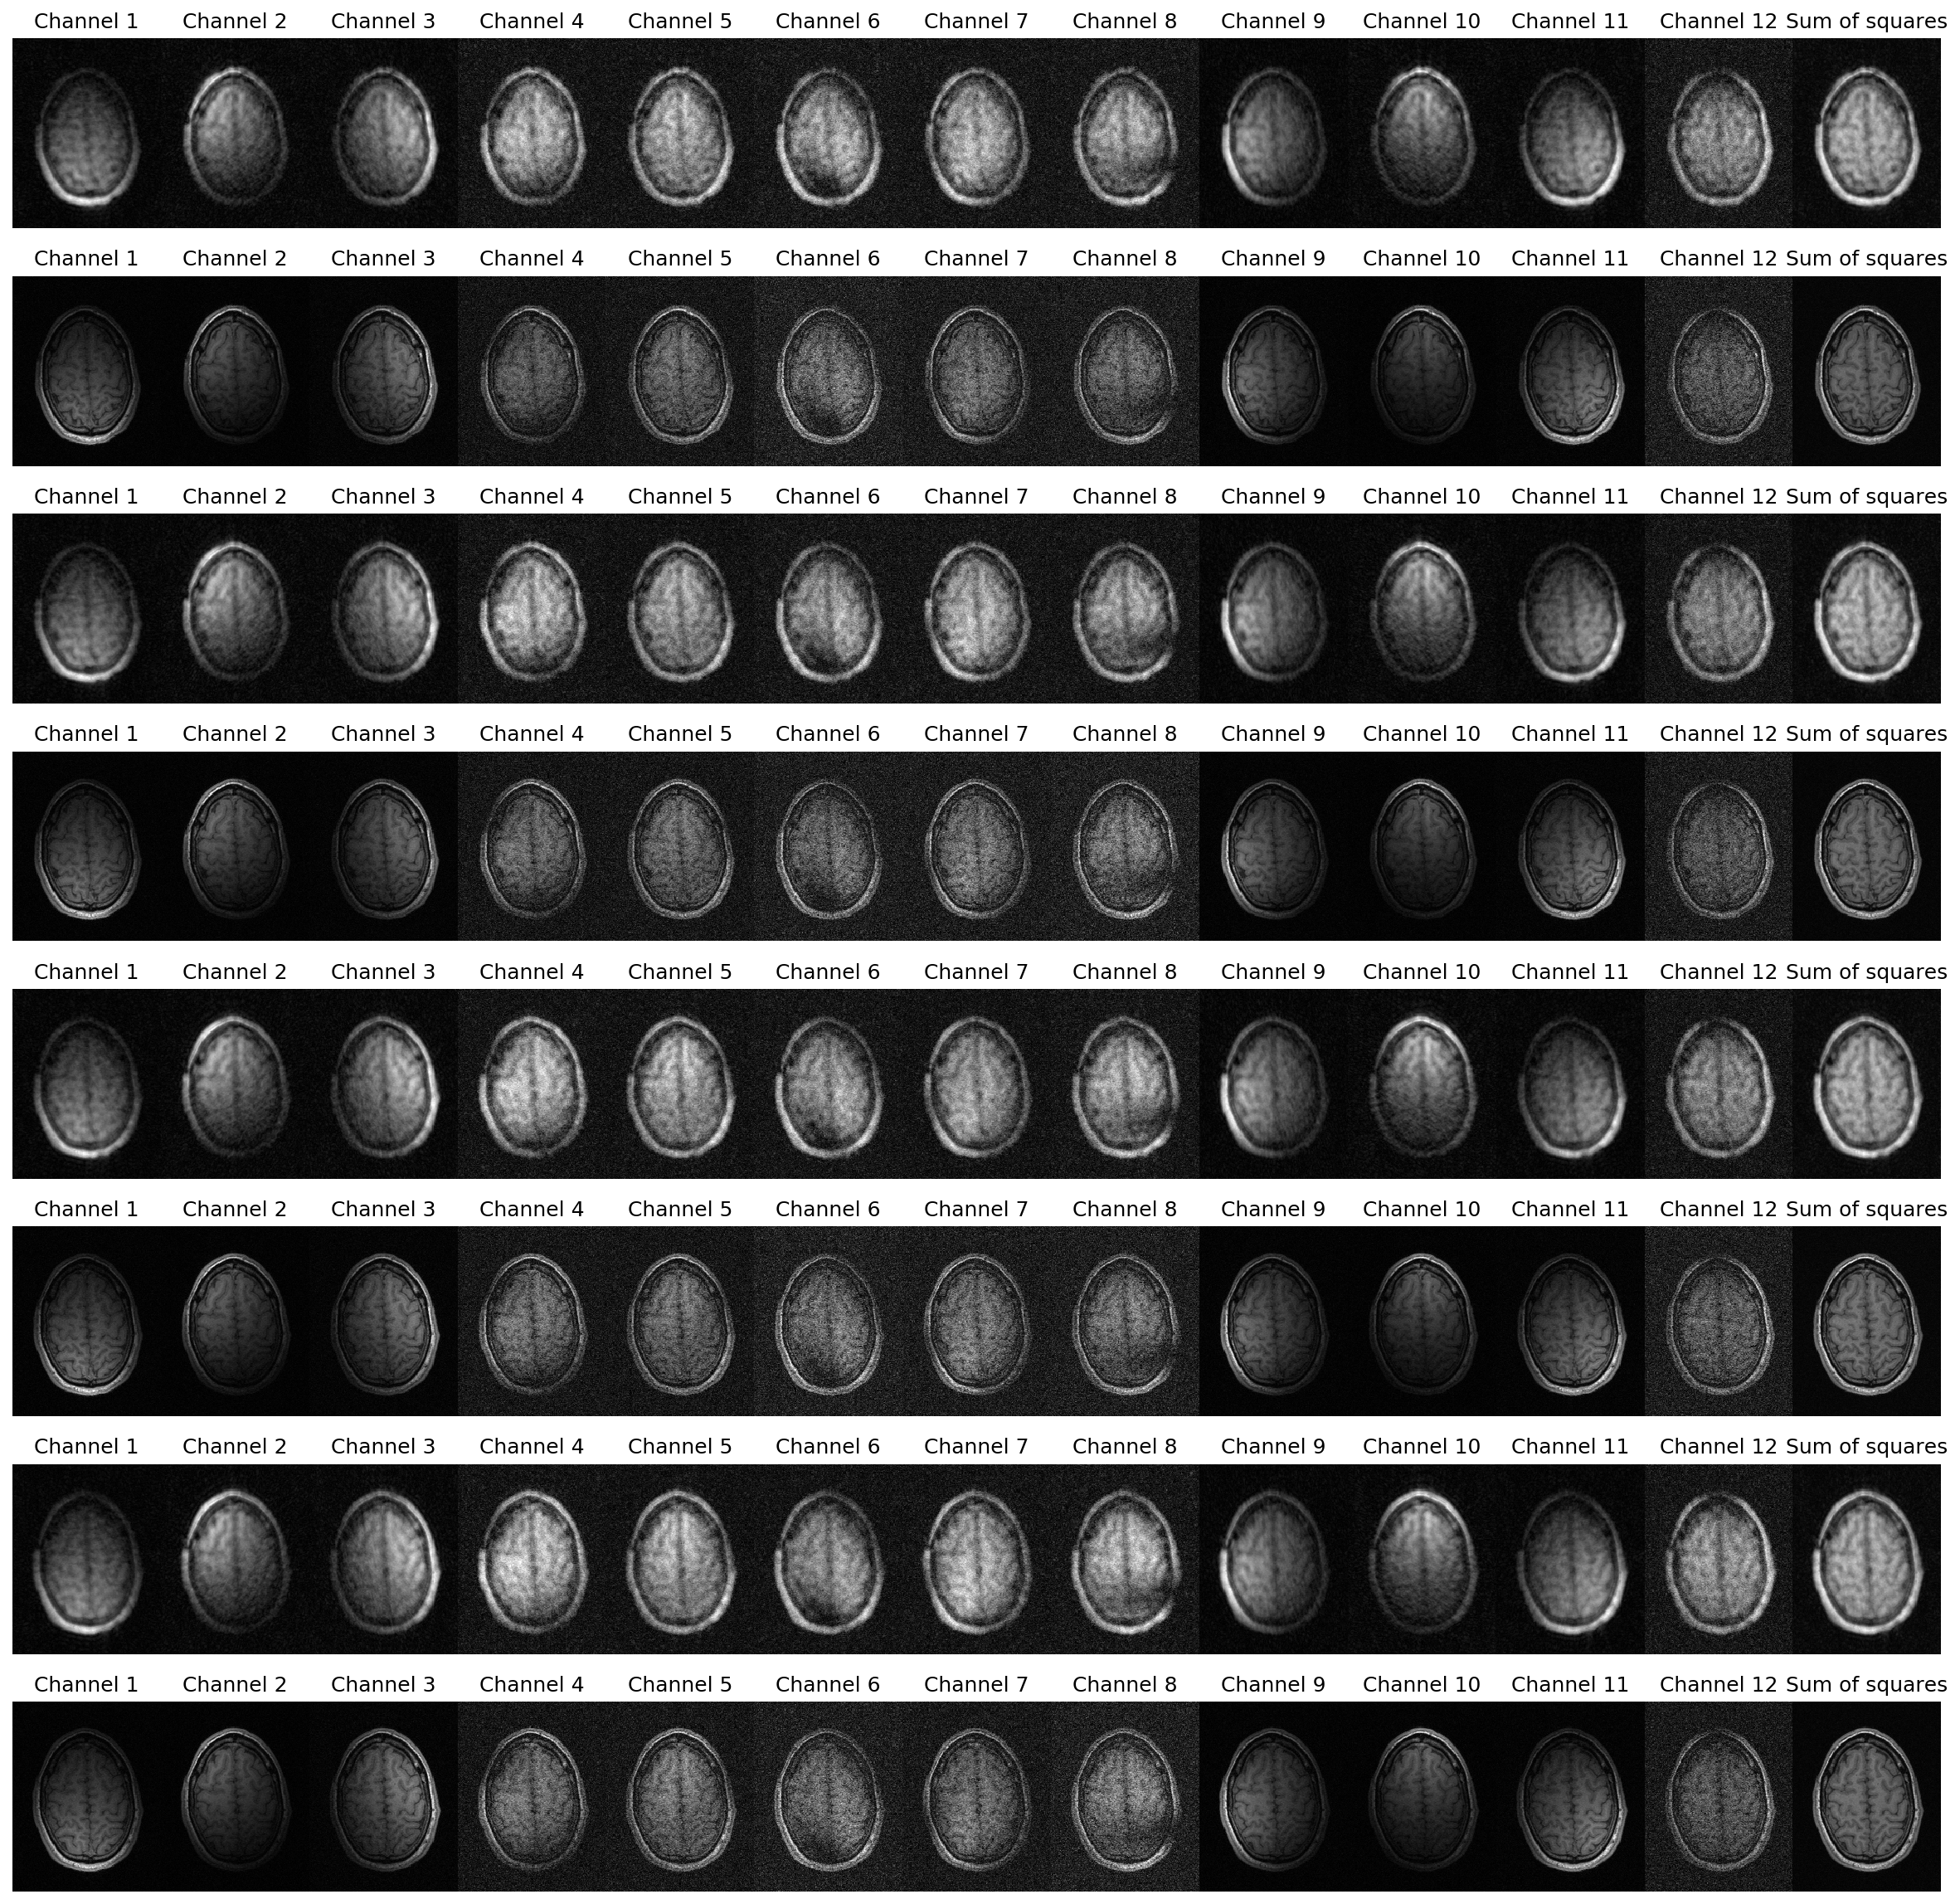

In [5]:
Xval,yval = val_generator.__getitem__(10)
print(Xval.shape)
print(yval.shape)

Xval = Xval[:,:,:,::2] +1j*Xval[:,:,:,1::2] # Convert to complex
yval = yval[:,:,:,::2] +1j*yval[:,:,:,1::2] # Convert to complex


plt.figure(figsize = (20,20),dpi = 150)
gs1 = gridspec.GridSpec(8, 13)
gs1.update(wspace=0.002, hspace=0.1)


for ii in range (batch_size*2):
    if ii%2 == 0:
        for jj in range(13): # 12-channels + root sum of squares
            if jj != 12:
                plt.subplot(gs1[ii*13+jj])
                plt.imshow(np.abs(Xval[ii//2,:,:,jj]),cmap = "gray")
                plt.axis("off")
                plt.title("Channel %d" %(jj+1))
                if  jj == 0:
                    plt.ylabel("Input")
            else:
                plt.subplot(gs1[ii*13+jj])
                plt.imshow(sum_of_squares(Xval[ii//2,:,:,:]),cmap = "gray")
                plt.axis("off")
                plt.title("Sum of squares")
    else:
        for jj in range(13): # 12-channels + root sum of squares
            if jj != 12:
                plt.subplot(gs1[ii*13+jj])
                plt.imshow(np.abs(yval[ii//2,:,:,jj]),cmap = "gray")
                plt.axis("off")
                plt.title("Channel %d" %(jj+1))
                if  jj == 1:
                    plt.ylabel("Target")
            else:
                plt.subplot(gs1[ii*13+jj])
                plt.imshow(sum_of_squares(yval[ii//2,:,:,:]),cmap = "gray")
                plt.axis("off")
                plt.title("Sum of squares")

plt.show()